                                                   MACHINE LEARNING FINAL ASSIGNMENT

NAME:SIDHARTH MANOJ
<br>REG NO:RA1911028010091
<br>section:J-1

                                                   Customer Churn Prediction

Importing the Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams

Loading the Dataset

In [2]:
customer_data = pd.read_csv(r'C:\Users\sm196\Downloads/Bank_Customer_Churn_dataset.csv')

EXPLORATORY DATA ANALYSIS

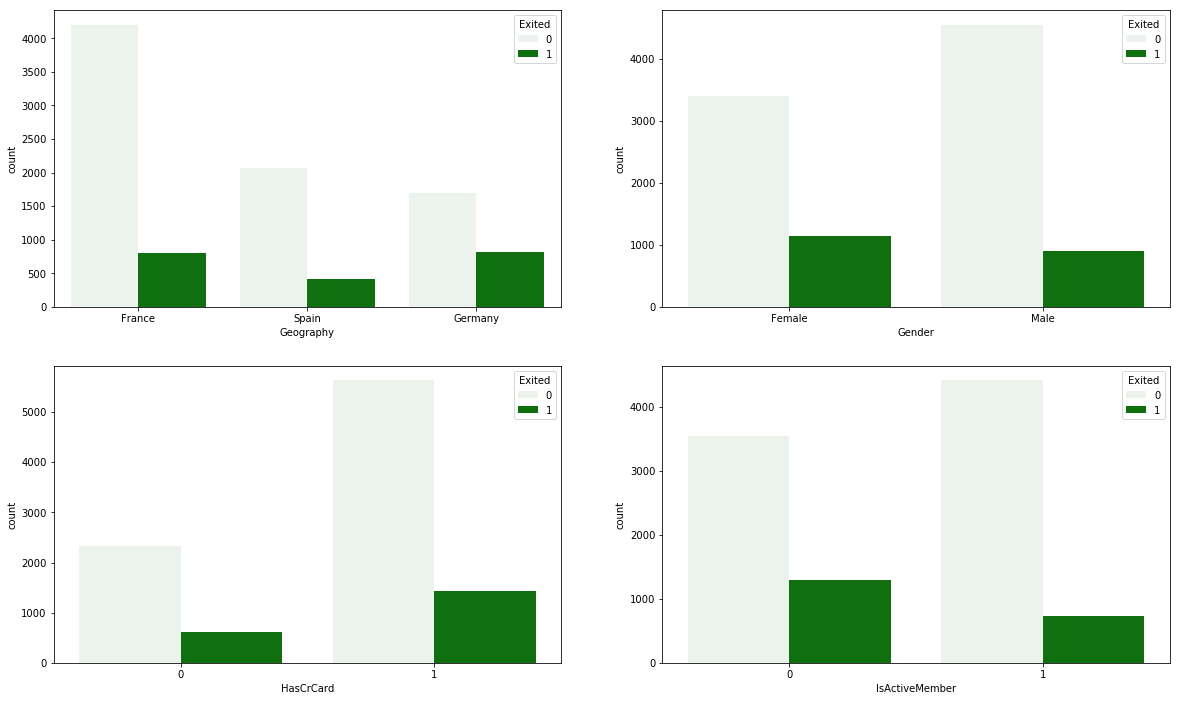

In [3]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = customer_data, ax=axarr[0][0],color='green',)
sns.countplot(x='Gender', hue = 'Exited',data = customer_data, ax=axarr[0][1],color='green')
sns.countplot(x='HasCrCard', hue = 'Exited',data = customer_data, ax=axarr[1][0],color='green')
sns.countplot(x='IsActiveMember', hue = 'Exited',data = customer_data, ax=axarr[1][1],color='green')

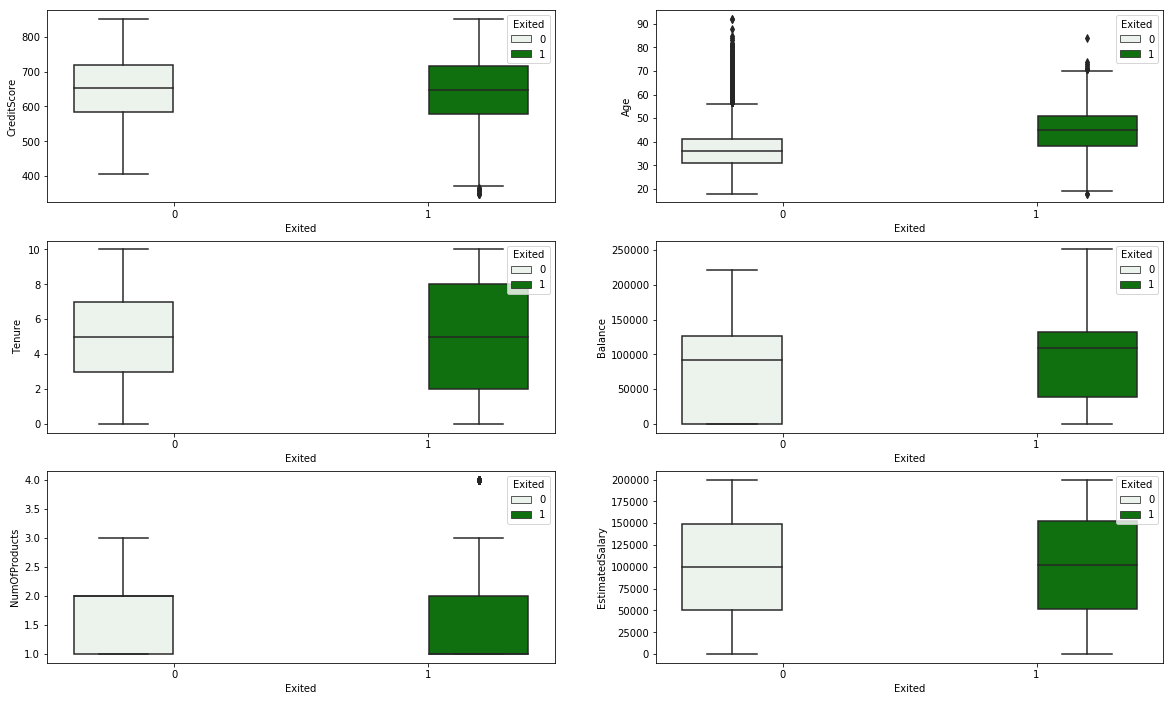

In [4]:
# Relations based on the continuous data attributes
    fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
    sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = customer_data, ax=axarr[0][0],color='green')
    sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = customer_data , ax=axarr[0][1],color='green')
    sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = customer_data, ax=axarr[1][0],color='green')
    sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = customer_data, ax=axarr[1][1],color='green')
    sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = customer_data, ax=axarr[2][0],color='green')
    sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = customer_data, ax=axarr[2][1],color='green')

Text(0.5,1,'Proportions of Customer Churn')

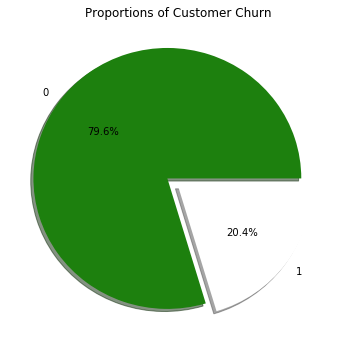

In [5]:
churnvalue = customer_data['Exited'].value_counts()
labels =customer_data['Exited'].value_counts().index
rcParams["figure.figsize"] = 6,6
colors = ['#1d800e', '#FFFFFF']
plt.pie(churnvalue, labels = labels, colors = colors, explode = (0.1,0),autopct = '%1.1f%%', shadow = True)
plt.title('Proportions of Customer Churn')

Feature Selection

In [6]:
columns = customer_data.columns.values.tolist()
print(columns)

['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


we'll remove the RowNumber, CustomerId, and Surname columns from our feature set. All the remaining columns do contribute to the customer churn in one way or another.

In [7]:
dataset = customer_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


Converting Categorical Columns to Numeric Columns

first isolate these two columns from our dataset

In [8]:
dataset =  dataset.drop(['Geography', 'Gender'], axis=1)

convert both the Geography and Gender columns into numeric columns.

In [9]:
Geography = pd.get_dummies(customer_data.Geography).iloc[:,1:]
Gender = pd.get_dummies(customer_data.Gender).iloc[:,1:]

Adding the Geography and Gender data frames back to the data set to create the final dataset.

In [10]:
dataset = pd.concat([dataset,Geography,Gender], axis=1)

Data Preprocessing

Isolating the variable that we are predicting from the dataset

In [11]:
X =  dataset.drop(['Exited'], axis=1)
y = dataset['Exited']

We'll use 20% of the data for the test set and the remaining 80% for the training set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Machine Learning Algorithm Training

I am going to use the RANDOM FOREST ALGORITHM, since it's simple and one of the most powerful algorithms for classification problems.

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)  
classifier.fit(X_train, y_train)  
predictions = classifier.predict(X_test)


Machine Learning Algorithm Evaluation

Evaluating the performance of the classification algorithm used.

In [14]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test,predictions ))  
print(accuracy_score(y_test, predictions ))


              precision    recall  f1-score   support

           0       0.89      0.95      0.92      1595
           1       0.73      0.51      0.60       405

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000

0.8635


The results indicate an accuracy of 86.35%, which means that our algorithm successfully predicts customer churn 86.35% of the time. 

Feature Evaluation

The following code creates a bar plot of the top 10 features for predicting customer churn:

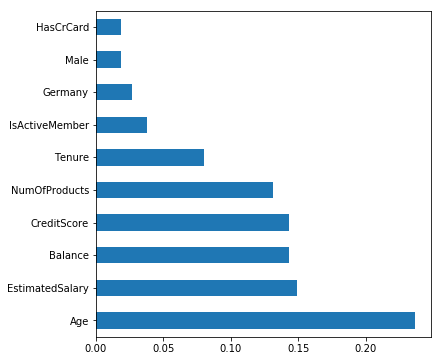

In [15]:
feat_importances = pd.Series(classifier.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')


CONCLUSION :Based on this data, we can see that age has the highest impact on customer churn, followed by a customer's estimated salary and account balance.